In [37]:
import numpy as np
import pandas as pd
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.timeseries import TimeSeries
from matplotlib import pyplot as plt
from pandas_datareader import data as pdr
import pandas_ta as ta
import talib
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.io as pio
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from utils.OHLC_Helper import getAlphaOHLC
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

API_KEY = 'EC1W3AWVDZ3LA1T8'
ts = TimeSeries(key=API_KEY, output_format='pandas')
ti = TechIndicators(key=API_KEY, output_format='pandas')

(1000, 1)


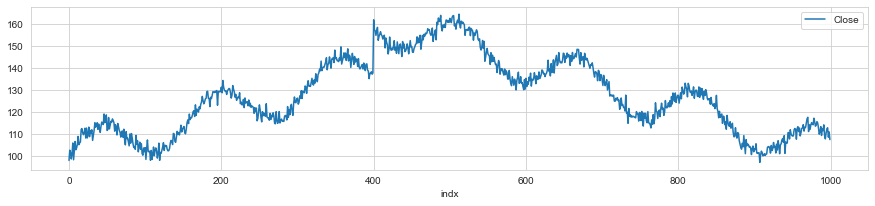

In [38]:
def sinSimulation():
    np.random.seed(123)
    size = 1000
    num= (np.sin(np.linspace(0,40,size))*10)+100
    noise = np.random.normal(0,2,size)
    df= pd.DataFrame({'Close':num+noise})
    df['indx']= df.index
    # df['Close'] = df['Close']+df['indx']*0.1

    def inner(row):
        # print('hello')
        if row['indx']<400:
            return row['Close']+row['indx']*0.1
        else:
            return row['Close']+(102-row['indx']*0.1)

    df['Close']= df.apply(inner, axis=1)
    df.set_index('indx',inplace=True)
    return df

# data, meta_data = ts.get_intraday(symbol='AACG', interval='1min',)
# data, meta_data = ts.get_daily(symbol='BA', outputsize='full')
#df = getAlphaOHLC(data)
df = sinSimulation()
# df['indx'] = np.arange(len(df))
# df.index =df['indx']
df.plot(y='Close', figsize=(15, 3))
# df.drop(columns=['indx'], inplace=True)
df.tail()
print(f'{df.shape}')


<AxesSubplot:xlabel='indx'>

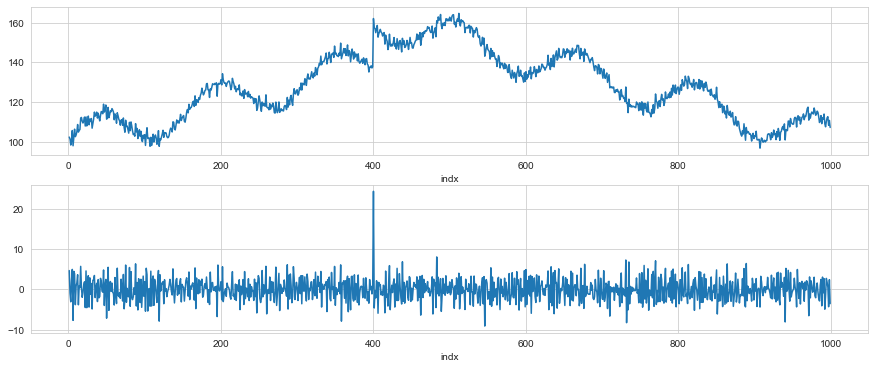

In [39]:
df['ret'] = df['Close'] - df['Close'].shift(1)
ret = df['ret'][1:]
figure, axis = plt.subplots(2,)
ret.plot(figsize=(15, 6))
plt.subplot(2,1,1)
cum = df.Close[0]+np.cumsum(ret)
cum.plot(figsize=(15, 6))

end value 107.32827070926882


,Close,ret,log_ret,log_ret_sum,log_ret_sum_exp
indx,,,,,
0,97.828739,NaN,NaN,NaN,NaN
1,102.494984,4.666246,0.046595,0.046595,1.047698
2,101.565902,-0.929082,-0.009106,0.037489,1.038201
3,98.485725,-3.080177,-0.030796,0.006693,1.006716
4,100.837563,2.351837,0.023599,0.030293,1.030756


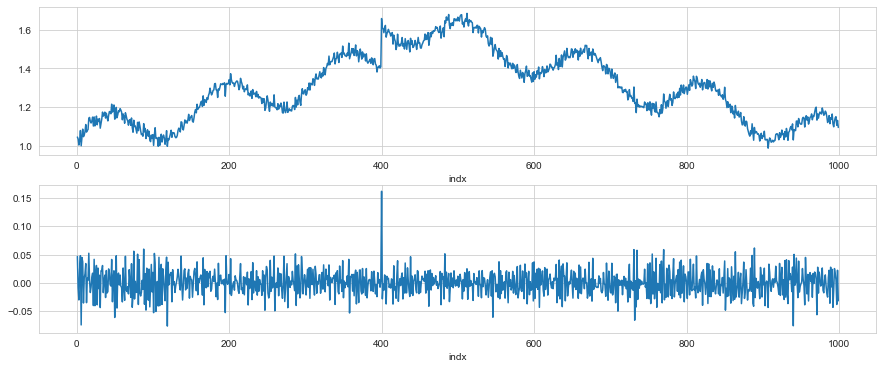

In [40]:
df['log_ret'] = np.log(df['Close']) - np.log(df['Close'].shift(1))
log_ret = df['log_ret'][1:]
df['log_ret_sum'] = np.cumsum(df['log_ret'])
df['log_ret_sum_exp']= np.exp(df['log_ret_sum'])

figure, axis = plt.subplots(2, )
df['log_ret'].plot(figsize=(15, 6))
plt.subplot(2,1,1)
df['log_ret_sum_exp'].plot(figsize=(15, 6))
print(f'end value', df['log_ret_sum_exp'][len(df)-1] * df['Close'][0])
df.head()

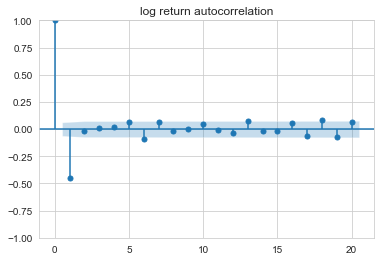

In [41]:
lag = 20
_ = plot_acf(ret, lags=lag, title='log return autocorrelation')

/Users/tharshikan/Library/Caches/pypoetry/virtualenvs/quanttrading-_M_FVGhZ-py3.9/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


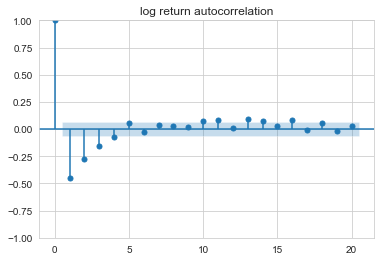

In [42]:
_ = plot_pacf(ret, lags=lag, title='log return autocorrelation')

split start 299 end 700
split 0.3 299
total data length: 999
train data length: 700
test data length: 299


indx
1      4.666246
2     -0.929082
3     -3.080177
4      2.351837
5      4.953966
         ...   
696   -0.468181
697   -4.262678
698    2.781943
699   -0.188033
700   -2.315026
Name: ret, Length: 700, dtype: float64

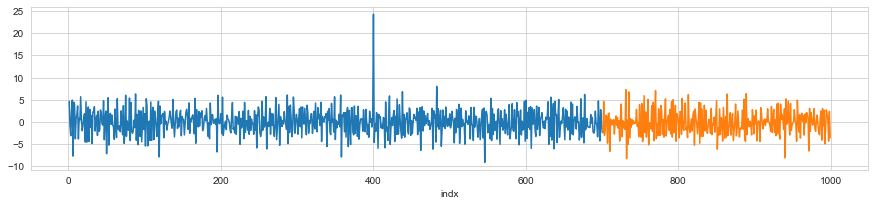

In [43]:
split_percent = 0.3
split = int(len(ret) * split_percent)
split_start = split
split_end = len(ret) - split
print(f'split start {split_start} end {split_end}')
print(f'split {split_percent} {split}')
train_data = ret[:len(ret) -split]
test_data = ret[-1*split:]
train_df = df[:len(df) -split]
test_df = df[-1*split:]
print(f'total data length: {len(ret)}')
print(f'train data length: {len(train_data)}')
print(f'test data length: {len(test_data)}')

train_data.plot(figsize=(15, 3))
test_data.plot(figsize=(15, 3))
train_data

In [44]:
AR_lag_p = 8
MA_lag_q = 2
order = (AR_lag_p, 0, MA_lag_q)
arma_model = ARIMA(train_data, order=order)
arma_result = arma_model.fit()

/Users/tharshikan/Library/Caches/pypoetry/virtualenvs/quanttrading-_M_FVGhZ-py3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tharshikan/Library/Caches/pypoetry/virtualenvs/quanttrading-_M_FVGhZ-py3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tharshikan/Library/Caches/pypoetry/virtualenvs/quanttrading-_M_FVGhZ-py3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tharshikan/Library/Caches/pypoetry/virtualenvs/quanttrading-_M_FVGhZ-py3.9/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood opti

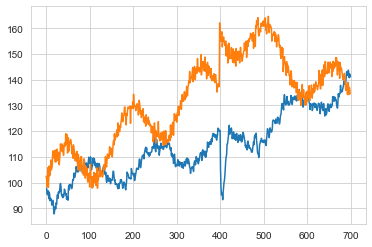

In [45]:
arma_pred = pd.Series(arma_result.fittedvalues)
cum_pred = df.Close[0]+np.cumsum(arma_pred)
cum_ret = df.Close[0]+np.cumsum(train_data.values)
plt.plot(cum_pred, label='predicted')
plt.plot(cum_ret, label='actual')
# plt.plot(lret.values)


/Users/tharshikan/Library/Caches/pypoetry/virtualenvs/quanttrading-_M_FVGhZ-py3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


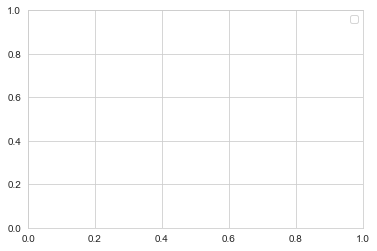

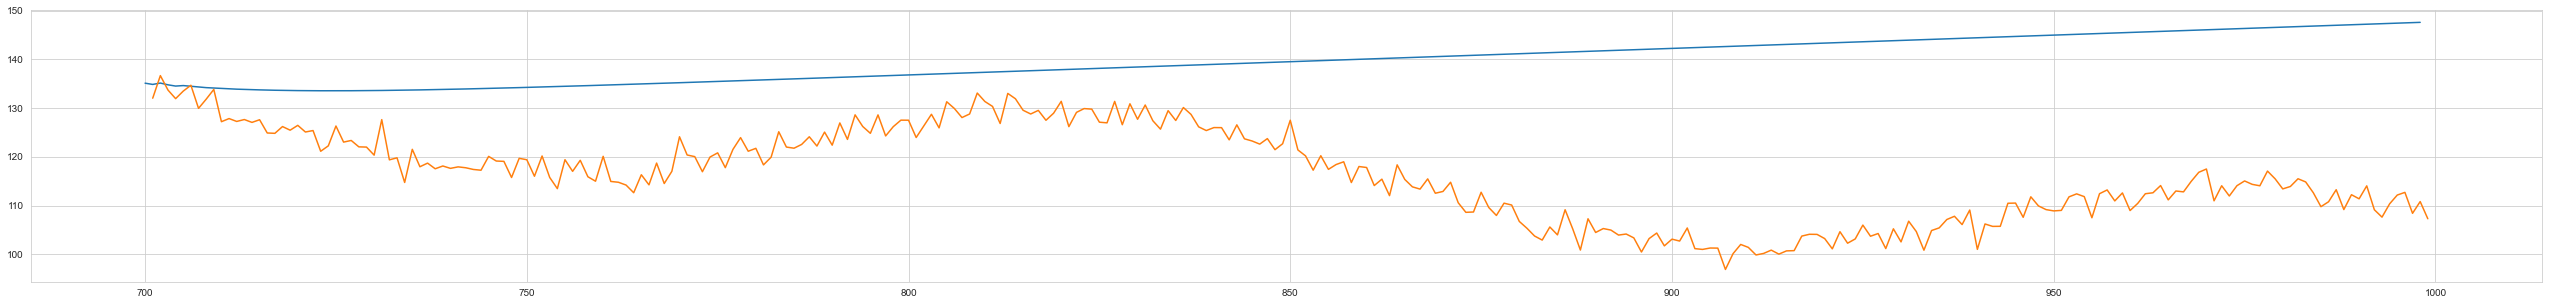

In [46]:

test = arma_result.predict(split_end, len(ret)-1)
cum_test = df.Close[split_end]+np.cumsum(test)
plt.legend()
plt.figure(figsize=(45, 5))
plt.plot(cum_test, label='predicted',)
a= np.cumsum(test_data)+ df.Close[split_end]
plt.plot(a, label='actual')

In [47]:
AR_lag_p = 9
MA_lag_q = 2
order = (AR_lag_p, 1, MA_lag_q)
arma_model = ARIMA(train_df['Close'], order=order)
arma_result = arma_model.fit()

/Users/tharshikan/Library/Caches/pypoetry/virtualenvs/quanttrading-_M_FVGhZ-py3.9/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


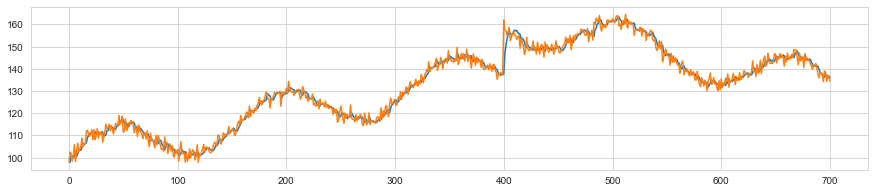

In [48]:
plt.figure(figsize=(15, 3))
plt.plot(arma_result.fittedvalues[1:])
plt.plot(train_df['Close'])

700    136.451601
701    135.042794
702    134.884360
703    134.940498
704    134.567339
705    134.419130
706    134.351121
707    134.179256
708    134.063088
709    133.840551
710    133.706266
711    133.567777
712    133.436137
713    133.310546
714    133.187207
715    133.085263
716    132.980926
717    132.883434
718    132.787391
719    132.696510
Name: predicted_mean, dtype: float64

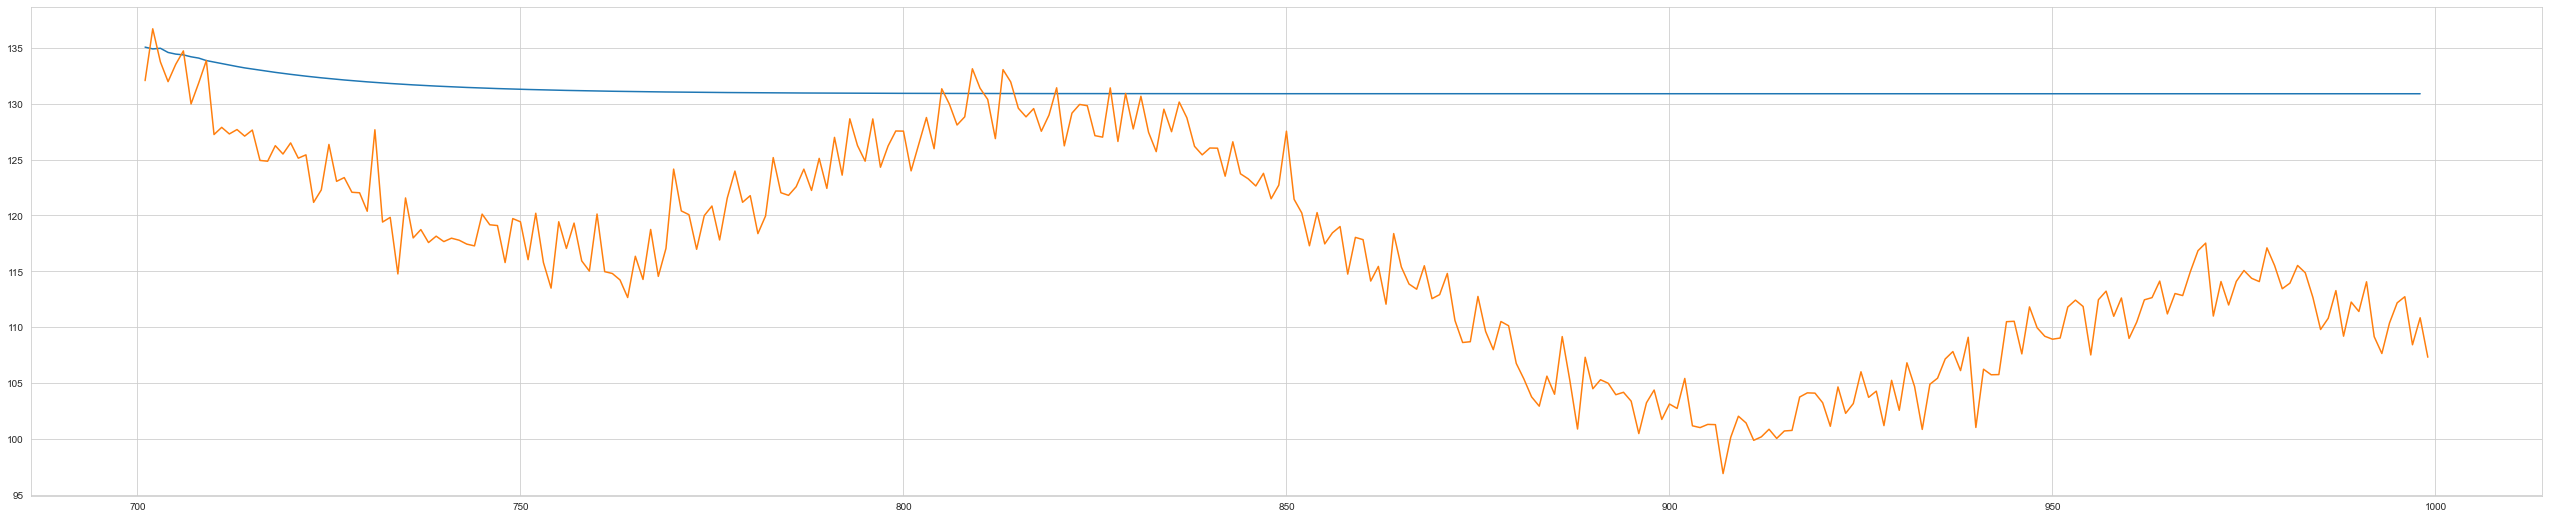

In [49]:
test = arma_result.predict(split_end, len(ret)-1)
plt.figure(figsize=(45, 9))
plt.plot(test[1:])
plt.plot(test_df['Close'])
test.head(20)

In [50]:
AR_lag_p = 9
MA_lag_q = 2
order = (AR_lag_p, 1, MA_lag_q)
arma_model = ARIMA(train_df['Close'], order=order)
arma_result = arma_model.fit()

/Users/tharshikan/Library/Caches/pypoetry/virtualenvs/quanttrading-_M_FVGhZ-py3.9/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


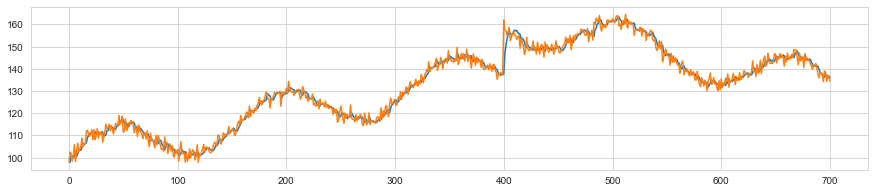

In [51]:
plt.figure(figsize=(15, 3))
plt.plot(arma_result.fittedvalues[1:])
plt.plot(train_df['Close'])

700    136.451601
701    135.042794
702    134.884360
703    134.940498
704    134.567339
705    134.419130
706    134.351121
707    134.179256
708    134.063088
709    133.840551
710    133.706266
711    133.567777
712    133.436137
713    133.310546
714    133.187207
715    133.085263
716    132.980926
717    132.883434
718    132.787391
719    132.696510
Name: predicted_mean, dtype: float64

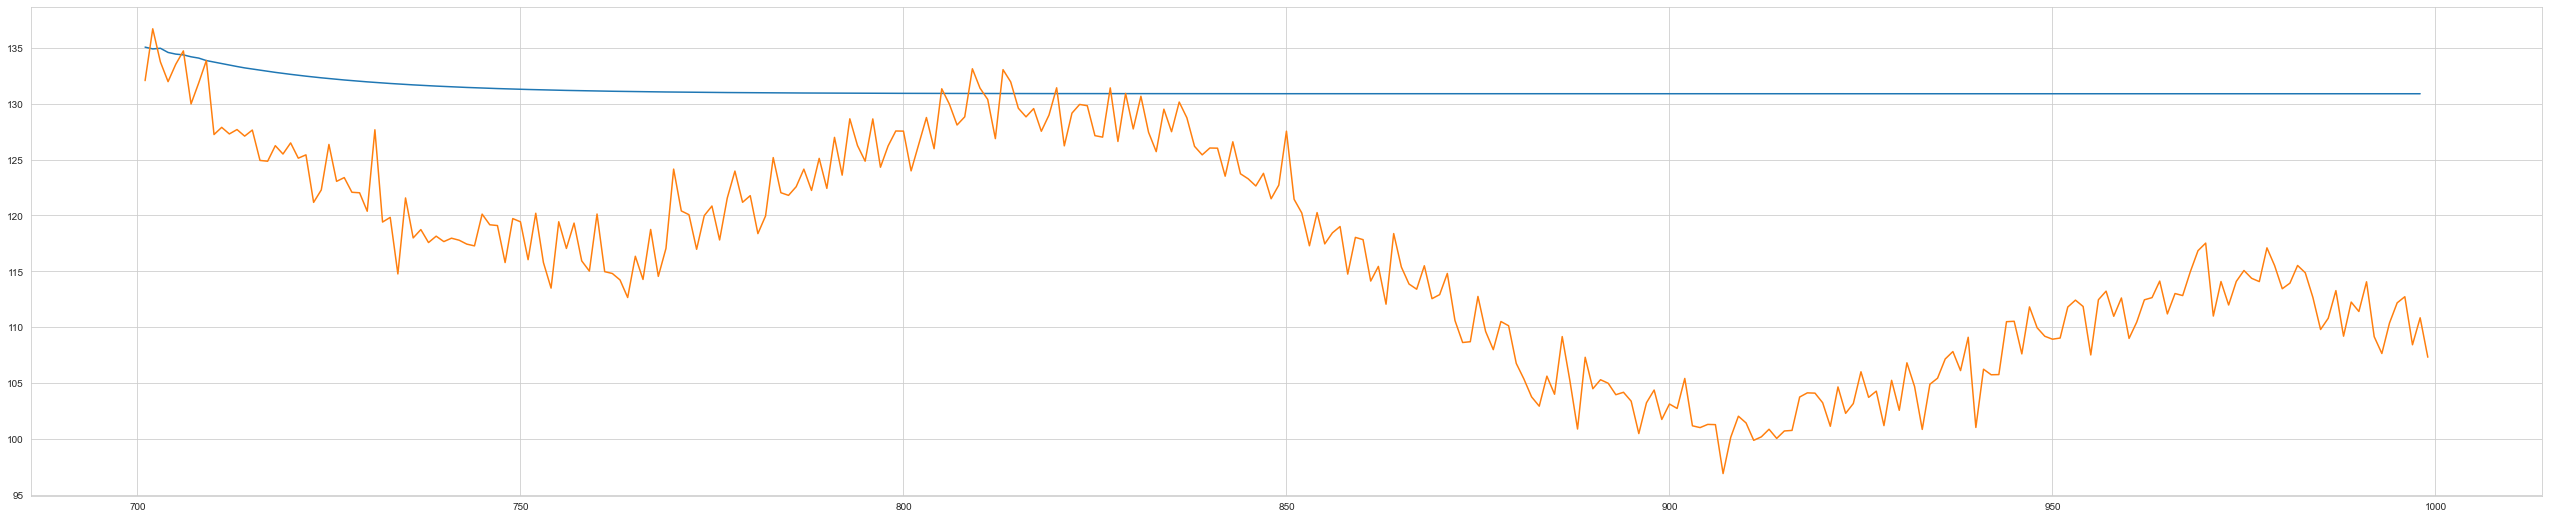

In [52]:
test = arma_result.predict(split_end, len(ret)-1)
plt.figure(figsize=(45, 9))
plt.plot(test[1:])
plt.plot(test_df['Close'])
test.head(20)